In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CHAPTER 2: Forward Pricing

In [2]:
def forward_price_physical_commodity(C, t, r, s, i):
    # C = commodity price
    # t = time to maturity / 12 months
    # r = interest rate
    # s = annual storage costs per commodity unit
    # i = annual insurance costs per commodity unit
    return C * (1+r*t) + (s*t) + (i*t)

def convenience_yield(F, t, r, s, i):
    # F = forward price
    # t = time to maturity / 12 months
    # r = interest rate
    # s = annual storage costs per commodity unit
    # i = annual insurance costs per commodity unit
    return (F-(s+i)*t) / (1+r*t)

def forward_price_stock_interest_on_dividends(S, t, r, d_i, t_i, r_i):
    # S = stock price
    # t = time to maturity / 12 months
    # r = interest rate over the life of the forward contract
    # d_i = each dividend payment expected prior to maturity of the forward contract
    # t_i = time remaining to maturity after each dividend payment
    # r_i = the applicable interest rate (the forward rate) from each dividend payment to maturity of the forward contract
    return S + (S*r*t) - np.sum(d_i * (1 + r_i + t_i))

def forward_price_stock_no_interest_on_dividends(S, t, r, D):
    # S = stock price
    # t = time to maturity / 12 months
    # r = interest rate over the life of the forward contract
    # D = dividend payments aggregated
    return S + (S*r*t) - np.sum(D)

def forward_price_bond_or_note_interest_on_dividends(B, t, r, c_i, t_i, r_i):
    # B = bond price
    # t = time to maturity / 12 months
    # r = interest rate over the life of the forward contract
    # c_i = each coupon payment expected prior to maturity of the forward contract
    # t_i = time remaining to maturity after each coupon payment
    # r_i = the applicable interest rate (the forward rate) from each coupon payment to maturity of the forward contract
    return (B * (1+r*t)) - np.sum(c_i * (1 + r_i * t_i))

def forward_price_foreign_currency(C_d, C_f, r_d, r_f, t):
    # C_d = domestic currency price
    # C_f = foreign currency price
    # r_d = domestic currency interest rate
    # r_f = foreign currency interest rate
    # t = time to maturity / 12 months
    return (C_d/C_f) * ( (1+r_d*t) / (1+r_f*t) )

def implied_spot_price_stock_or_future_option(F, D, r, t):
    # F = forward price
    # D = dividend payments aggregated
    # r = interest rate
    # t = time to maturity / 12 months
    return (F + np.sum(D)) / (1+r*t)

def implied_interest_rate_stock_or_future_option(F, D, S, t):
    # F = forward price
    # D = dividend payments aggregated
    # S = stock spot price
    # t = time to maturity / 12 months
    return (((F + np.sum(D)) / S) - 1) / t

def implied_dividend_stock_or_future_option(S, r, t, F):
    # S = stock spot price
    # r = interest rate
    # t = time to maturity / 12 months
    # F = forward price
    return  (S * (1+r*t) ) - F

In [ ]:
convenience_yield(77.40,3/12,0.08,3.00,0.60)

In [ ]:
forward_price_stock_interest_on_dividends(67.00, 8/12, 0.06, 0.33, np.array([7/12, 1/12]), np.array([0.062, 0.065]))

In [ ]:
forward_price_stock_no_interest_on_dividends(67.00, 8/12, 0.06, np.array([0.33, 0.33]))

In [ ]:
forward_price_bond_or_note_interest_on_dividends(109.76, 10/12, 0.08, 5.25, np.array([8/12, 2/12]), np.array([0.082, 0.085]))

In [ ]:
forward_price_foreign_currency(1.50, 1.00, 0.06, 0.04, 6/12)

In [ ]:
implied_interest_rate_stock_or_future_option(69.50, np.array([0.66]), 67.00, 8/12)

In [ ]:
implied_dividend_stock_or_future_option(67.00, 0.06, 8/12, 69.50)

# CHAPTER 4: Expiration Profit and Loss

In [3]:
def intrinsic_values_call_options(spot_prices, strike_price):
    """
    Calculate the intrinsic values of a call option for a series of spot prices using optimized numpy operations.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.

    Returns:
    np.array: Array of intrinsic values for each spot price.
    """
    # Calculate the difference between spot prices and strike price
    intrinsic_values = spot_prices - strike_price

    # Use numpy's maximum function to apply the max(0, S - X) operation across the array
    return np.maximum(intrinsic_values, 0)

def intrinsic_values_put_options(spot_prices, strike_price):
    """
    Calculate the intrinsic values of a put option for a series of spot prices using optimized numpy operations.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.

    Returns:
    np.array: Array of intrinsic values for each spot price.
    """
    # Calculate the difference between strike price and spot prices
    intrinsic_values = strike_price - spot_prices

    # Use numpy's maximum function to apply the max(0, X - S) operation across the array
    return np.maximum(intrinsic_values, 0)

In [ ]:
intrinsic_values_call_options(np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125]), 95)

In [ ]:
intrinsic_values_put_options(np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125]), 110)

## Figure 4-1 Plot Parity Graph for  Long Call

In [75]:
def plot_long_call_option_parity(spot_prices, strike_price):
    """
    Plot the parity graph for a call option using seaborn.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values using the optimized function
    intrinsic_values = intrinsic_values_call_options(spot_prices, strike_price)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the intrinsic values
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="magenta", label="Intrinsic Value")

    # Plot the red dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Draw the red line below the strike price (option has no value)
    plt.plot([min(spot_prices), strike_price], [0, 0], color="magenta", linewidth=2)

    # Highlight the positive payoff region above the strike price
    plt.fill_between(spot_prices, intrinsic_values, where=spot_prices >= strike_price, color="green", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Call Option Payoff Parity Graph")
    plt.legend()

    # Show the plot
    plt.show()

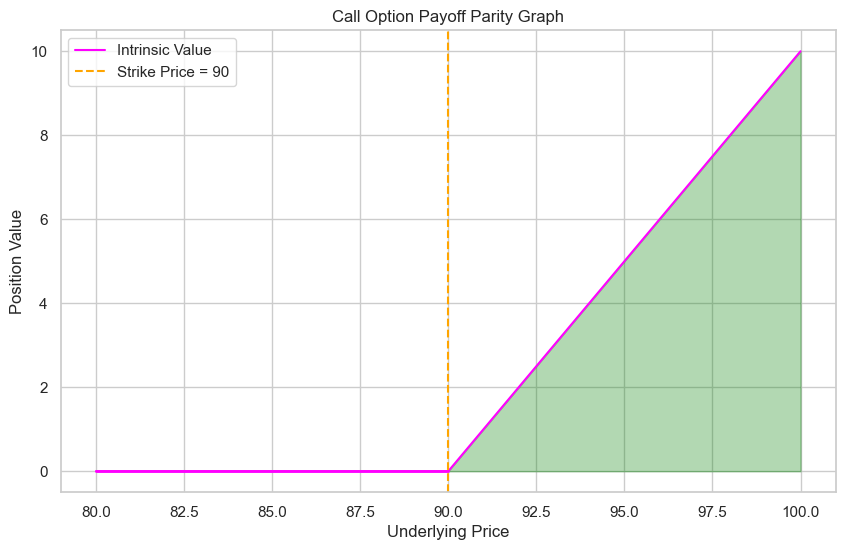

In [76]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100])
strike_price = 90
plot_long_call_option_parity(spot_prices, strike_price)


## Figure 4-2 Plot Parity Graph for Short Call

In [5]:
def plot_short_call_option_parity(spot_prices, strike_price):
    """
    Plot the parity graph for a short call option using seaborn.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values using the optimized function for short call
    intrinsic_values = -intrinsic_values_call_options(spot_prices, strike_price)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the intrinsic values for the short call
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="magenta", label="Position Value (Short Call)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Draw the magenta line below the strike price (option has no value)
    plt.plot([min(spot_prices), strike_price], [0, 0], color="magenta", linewidth=2)

    # Highlight the negative payoff region above the strike price
    plt.fill_between(spot_prices, intrinsic_values, where=spot_prices >= strike_price, color="red", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Short Call Option Payoff Parity Graph")
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100])
strike_price = 90
plot_short_call_option_parity(spot_prices, strike_price)

## Figure 4-3 Plot Parity Graph for Long Put

In [6]:
def plot_long_put_option_parity(spot_prices, strike_price):
    """
    Plot the parity graph for a long put option using seaborn.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values for the long put option
    intrinsic_values = intrinsic_values_put_options(spot_prices, strike_price)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the intrinsic values for the long put
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="magenta", label="Position Value (Long Put)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Draw the blue line above the strike price (option has no value)
    plt.plot([strike_price, max(spot_prices)], [0, 0], color="magenta", linewidth=2)

    # Highlight the positive payoff region below the strike price
    plt.fill_between(spot_prices, intrinsic_values, where=spot_prices <= strike_price, color="green", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Long Put Option Payoff Parity Graph")
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100])
strike_price = 90
plot_long_put_option_parity(spot_prices, strike_price)

## Figure 4-4 Plot Parity Graph for Short Put

In [122]:
def plot_short_put_option_parity(spot_prices, strike_price):
    """
    Plot the parity graph for a short put option using seaborn.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values for the short put option
    intrinsic_values = -intrinsic_values_put_options(spot_prices, strike_price)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the intrinsic values for the short put
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="magenta", label="Position Value (Short Put)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Draw the magenta line above the strike price (option has no value)
    plt.plot([strike_price, max(spot_prices)], [0, 0], color="magenta", linewidth=2)

    # Highlight the negative payoff region below the strike price
    plt.fill_between(spot_prices, intrinsic_values, where=spot_prices <= strike_price, color="red", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Short Put Option Payoff Parity Graph")
    plt.legend()

    # Show the plot
    plt.show()

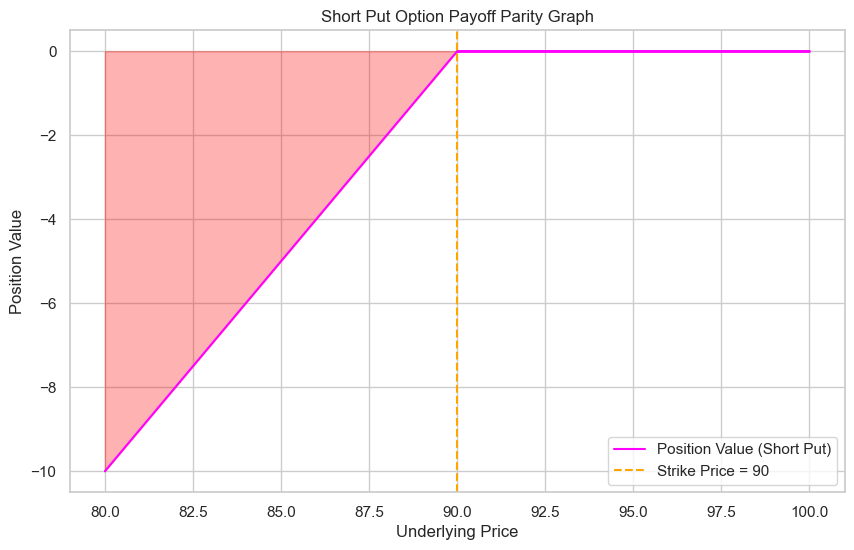

In [123]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100])
strike_price = 90
plot_short_put_option_parity(spot_prices, strike_price)

## Slope

In [ ]:
spot_prices = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
strike_price = 100

In [ ]:
intrinsic_values_call_options(spot_prices, strike_price)

In [ ]:
-intrinsic_values_call_options(spot_prices, strike_price)

In [ ]:
intrinsic_values_put_options(spot_prices, strike_price)

In [ ]:
-intrinsic_values_put_options(spot_prices, strike_price)

## Long an in-the-money call

In [8]:
def long_call_slope(spot_prices, strike_price):
    """
    Calculate the slope of a long in-the-money call option.

    Parameters:
    spot_prices (np.array): Array of spot prices (underlying prices).
    strike_price (float): The strike price of the call option.

    Returns:
    (np.array): The slope of the long call option.
    """
    # Calculate the intrinsic values for the call option
    intrinsic_values = intrinsic_values_call_options(spot_prices, strike_price)

    # Calculate the slope using the differences between consecutive in-the-money points
    slope = np.diff(intrinsic_values) / np.diff(spot_prices)

    # Return the slope, which should be consistent across the in-the-money region
    return slope

In [ ]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
strike_price = 110
long_call_slope(spot_prices, strike_price)

## Short an in-the-money call

In [9]:
def short_call_slope(spot_prices, strike_price):
    """
    Calculate the slope of a short in-the-money call option.

    Parameters:
    spot_prices (np.array): Array of spot prices (underlying prices).
    strike_price (float): The strike price of the call option.

    Returns:
    (np.array): The slope of the short call option.
    """
    # Calculate the intrinsic values for the call option
    intrinsic_values = -intrinsic_values_call_options(spot_prices, strike_price)

    # Calculate the slope using the differences between consecutive in-the-money points
    slope = np.diff(intrinsic_values) / np.diff(spot_prices)

    # Return the slope, which should be consistent across the in-the-money region
    return slope

In [ ]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
strike_price = 110
short_call_slope(spot_prices, strike_price)

## Long an in-the-money put

In [10]:
def long_put_slope(spot_prices, strike_price):
    """
    Calculate the slope of a long in-the-money put option.

    Parameters:
    spot_prices (np.array): Array of spot prices (underlying prices).
    strike_price (float): The strike price of the put option.

    Returns:
    (np.array): The slope of the long put option.
    """
    # Calculate the intrinsic values for the put option
    intrinsic_values = intrinsic_values_put_options(spot_prices, strike_price)

    # Calculate the slope using the differences between consecutive in-the-money points
    slope = np.diff(intrinsic_values) / np.diff(spot_prices)

    # Return the slope, which should be consistent across the in-the-money region
    return slope

In [ ]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
strike_price = 110
long_put_slope(spot_prices, strike_price)

## Short an in-the-money put

In [11]:
def short_put_slope(spot_prices, strike_price):
    """
    Calculate the slope of a short in-the-money put option.

    Parameters:
    spot_prices (np.array): Array of spot prices (underlying prices).
    strike_price (float): The strike price of the put option.

    Returns:
    (np.array): The slope of the short put option.
    """
    # Calculate the intrinsic values for the put option
    intrinsic_values = -intrinsic_values_put_options(spot_prices, strike_price)

    # Calculate the slope using the differences between consecutive in-the-money points
    slope = np.diff(intrinsic_values) / np.diff(spot_prices)

    # Return the slope, which should be consistent across the in-the-money region
    return slope

In [ ]:
# Example usage:
spot_prices = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
strike_price = 110
short_put_slope(spot_prices, strike_price)

## Example Position Figure 4-9

In [53]:
spot_prices = np.array([60, 65, 70, 75, 80, 85])
(3*long_call_slope(spot_prices, 65) 
+2*long_put_slope(spot_prices, 65)
+2*long_call_slope(spot_prices, 70) 
+4*short_put_slope(spot_prices, 70)
+6*short_call_slope(spot_prices, 75)
+3*long_put_slope(spot_prices, 75)
+4*long_call_slope(spot_prices, 80)
+2*short_put_slope(spot_prices, 80)
+np.array([-4., -4. , -4., -4., -4.]))

array([-3.,  2.,  0., -3., -1.])

In [59]:
def aggregate_slopes(spot_prices, strike_prices, contract_type, contract_amounts, underlying_contracts):
    """
    Calculate the aggregate slopes for a portfolio of options and underlying contracts.

    Parameters:
    - spot_prices (np.array): Array of current spot prices for the underlying asset.
    - strike_prices (np.array): Array of strike prices corresponding to each contract.
    - contract_type (np.array): Array of strings indicating the type of each contract.
                                Expected values are "long-call", "long-put", "short-call", "short-put".
    - contract_amounts (np.array): Array of integers indicating the number of contracts for each option.
    - underlying_contracts (int or float): The number of underlying contracts (positive for long, negative for short).

    Returns:
    - total_slopes (np.array): The aggregated slopes for the portfolio, based on the given contracts and underlying positions.
    """

    # Initialize an array for the aggregate slopes, excluding the last element of spot_prices
    # This assumes that we do not want to calculate the slope for the last spot price
    total_slopes = np.zeros_like(spot_prices[:-1], dtype=float)

    # Create a dictionary to map contract types to their respective slope functions
    # This allows for dynamic selection of the correct function based on contract_type
    slope_functions = {
        "long-call": long_call_slope,
        "long-put": long_put_slope,
        "short-call": short_call_slope,
        "short-put": short_put_slope
    }

    # Iterate over each contract in the portfolio
    # zip() is used to loop over strike_prices, contract_type, and contract_amounts in parallel
    for strike, ctype, amount in zip(strike_prices, contract_type, contract_amounts):
        # Retrieve the appropriate slope function based on the contract type
        slope_func = slope_functions[ctype]

        # Calculate the slope for the current spot prices and strike price
        # This returns an array of slopes, one for each spot price
        slopes = slope_func(spot_prices, strike)

        # Add the calculated slopes to the total slopes, scaled by the number of contracts
        total_slopes += amount * slopes

    # Add the effect of the underlying contracts to the total slopes
    # The underlying contracts are considered to apply equally across all spot prices (except the last)
    total_slopes += underlying_contracts * np.ones_like(spot_prices[:-1])

    return total_slopes

In [60]:
# Example usage
spot_prices = np.array([60, 65, 70, 75, 80, 85])
strike_prices = np.array([65, 65, 70, 70, 75, 75, 80, 80])
contract_type = np.array(["long-call", "long-put", "long-call", "short-put", "short-call", "long-put", "long-call", "short-put"])
contract_amounts = np.array([3, 2, 2, 4, 6, 3, 4, 2])
underlying_contracts = -4

In [61]:
# Calculate the aggregate slopes
slopes = aggregate_slopes(spot_prices, strike_prices, contract_type, contract_amounts, underlying_contracts)
print(slopes)

[-3.  2.  0. -3. -1.]


In [64]:
def plot_parity_graph_with_aggregate_slopes(spot_prices, slopes):
    """
    Plot the parity graph using spot prices and slopes.

    Parameters:
    spot_prices (np.array): Array of spot prices (underlying prices).
    slopes (np.array): Array of slopes corresponding to intervals between spot prices.
    
    Returns:
    None: Displays the parity graph.
    """
    # Initialize the position values with the first value being zero
    position_values = [0]

    # Calculate the position values based on slopes and spot prices
    for i in range(len(slopes)):
        # Calculate the change in position value using the slope
        change_in_position = slopes[i] * (spot_prices[i+1] - spot_prices[i])
        # Append the new position value
        position_values.append(position_values[-1] + change_in_position)

    # Convert position_values to a numpy array for plotting
    position_values = np.array(position_values)

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the parity graph
    sns.lineplot(x=spot_prices, y=position_values, marker="o", color="magenta", label="Position Value")

    # Annotate the slopes on the plot
    for i in range(len(slopes)):
        mid_point = (spot_prices[i] + spot_prices[i+1]) / 2
        plt.text(mid_point, (position_values[i] + position_values[i+1]) / 2, f"Slope = {slopes[i]:.1f}",
                 ha='center', va='center', fontsize=9, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Parity Graph with Slopes")
    plt.legend()

    # Show the plot
    plt.show()

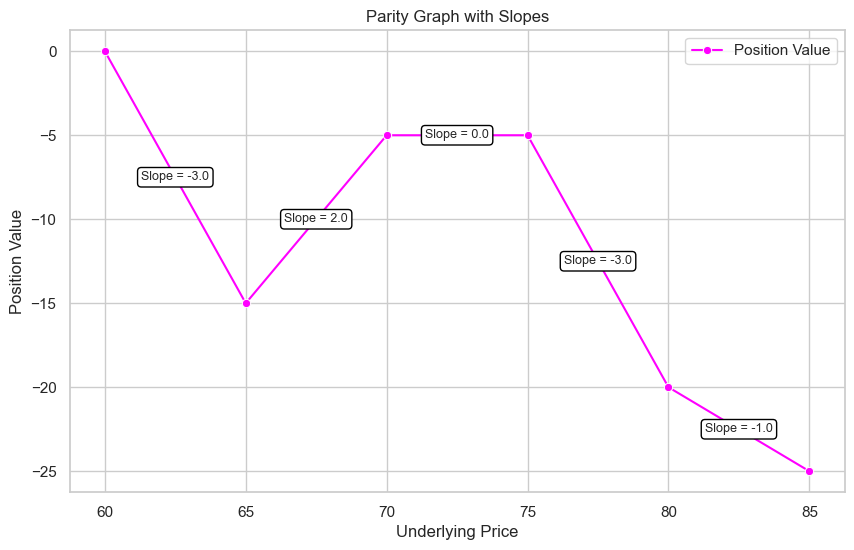

In [65]:
plot_parity_graph_with_aggregate_slopes(spot_prices, slopes)

## Expiration Profit and Loss

### Long Call Parity with Purchase Price

In [149]:
def plot_long_call_option_parity_with_purchase_price(spot_prices, strike_price, purchase_price):
    """
    Plot the parity graph for a call option considering the purchase price.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    purchase_price (float): Price paid to purchase the option.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values
    intrinsic_values = intrinsic_values_call_options(spot_prices, strike_price)

    # Adjust the intrinsic values by subtracting the purchase price
    adjusted_values = intrinsic_values - purchase_price

    # Calculate the breakeven point
    breakeven_point = strike_price + purchase_price

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the horizontal line at y=0 for the parity graph
    plt.axhline(0, color="black", linestyle="-")

    # Plot the original intrinsic values (faint dashed line)
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="blue", linestyle="--", label="Intrinsic Value (No Purchase Price)")

    # Plot the adjusted intrinsic values considering the purchase price
    sns.lineplot(x=spot_prices, y=adjusted_values, color="magenta", label="Intrinsic Value (With Purchase Price)")

    # Plot the vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Highlight the breakeven point
    plt.scatter(breakeven_point, 0, color="red", zorder=5)
    plt.text(breakeven_point, 0, f"  Breakeven = {breakeven_point:.2f}", verticalalignment='bottom', horizontalalignment='left', color="red")

    # Highlight the negative payoff region above the strike price
    plt.fill_between(spot_prices, adjusted_values, where=spot_prices < breakeven_point, color="red", alpha=0.3)

    # Highlight the positive payoff region above the strike price
    plt.fill_between(spot_prices, adjusted_values, where=spot_prices >= breakeven_point, color="green", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Call Option Payoff Parity Graph with Purchase Price")
    plt.legend()

    # Show the plot
    plt.show()

In [150]:
# Example usage:
spot_prices = np.linspace(80, 120, 400)
strike_price = 100
purchase_price = 3.50

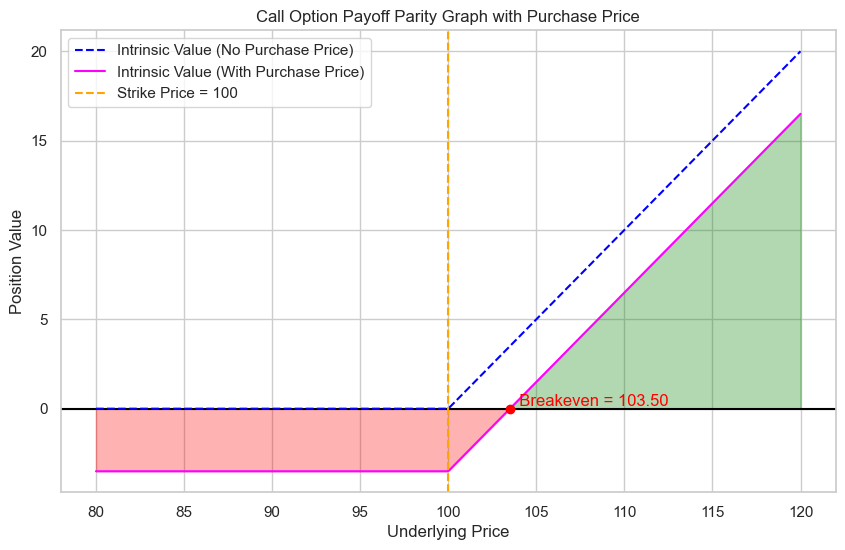

In [151]:
plot_long_call_option_parity_with_purchase_price(spot_prices, strike_price, purchase_price)

### Short Put Parity with Purchase Price

In [146]:
def plot_short_put_option_parity_with_purchase_price(spot_prices, strike_price, purchase_price):
    """
    Plot the parity graph for a short put option considering the purchase price.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    purchase_price (float): Price received to sell the option.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values for the short put option
    intrinsic_values = -intrinsic_values_put_options(spot_prices, strike_price)

    # Adjust the intrinsic values by adding the purchase price
    adjusted_values = intrinsic_values + purchase_price

    # Calculate the breakeven point
    breakeven_point = strike_price - purchase_price

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the horizontal line at y=0 for the parity graph
    plt.axhline(0, color="black", linestyle="-")

    # Plot the original intrinsic values (faint dashed line)
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="blue", linestyle="--", label="Intrinsic Value (No Purchase Price)")

    # Plot the adjusted intrinsic values considering the purchase price
    sns.lineplot(x=spot_prices, y=adjusted_values, color="magenta", label="Intrinsic Value (With Purchase Price)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Highlight the breakeven point
    plt.scatter(breakeven_point, 0, color="red", zorder=5)
    plt.text(breakeven_point, 0, f"  Breakeven = {breakeven_point:.2f}", verticalalignment='bottom', horizontalalignment='left', color="red")

    # Highlight the negative payoff region above the strike price
    plt.fill_between(spot_prices, adjusted_values, where=spot_prices < breakeven_point, color="red", alpha=0.3)

    # Highlight the positive payoff region above the strike price
    plt.fill_between(spot_prices, adjusted_values, where=spot_prices >= breakeven_point, color="green", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Short Put Option Payoff Parity Graph with Purchase Price")
    plt.legend()

    # Show the plot
    plt.show()

In [147]:
# Example usage:
spot_prices = np.linspace(60, 100, 400)
strike_price = 80
purchase_price = 5.00

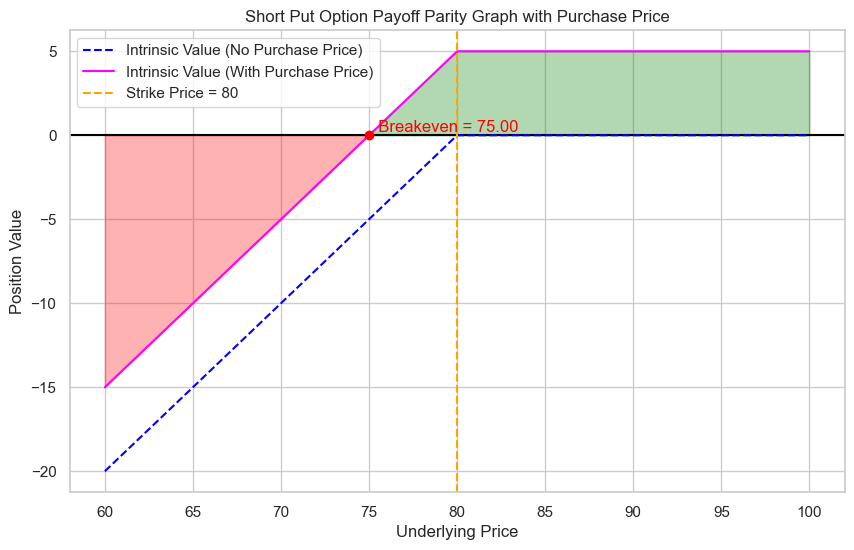

In [148]:
plot_short_put_option_parity_with_purchase_price(spot_prices, strike_price, purchase_price)

### Long Put Parity with Purchase Price

In [140]:
def plot_long_put_option_parity_with_purchase_price(spot_prices, strike_price, purchase_price):
    """
    Plot the parity graph for a long put option considering the purchase price.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    purchase_price (float): Price paid to purchase the option.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values for the long put option
    intrinsic_values = intrinsic_values_put_options(spot_prices, strike_price)

    # Adjust the intrinsic values by subtracting the purchase price
    adjusted_values = intrinsic_values - purchase_price

    # Calculate the breakeven point
    breakeven_point = strike_price - purchase_price

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the horizontal line at y=0 for the parity graph
    plt.axhline(0, color="black", linestyle="-")

    # Plot the original intrinsic values (faint dashed line)
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="blue", linestyle="--", label="Intrinsic Value (No Purchase Price)")

    # Plot the adjusted intrinsic values considering the purchase price
    sns.lineplot(x=spot_prices, y=adjusted_values, color="magenta", label="Intrinsic Value (With Purchase Price)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Highlight the breakeven point
    plt.scatter(breakeven_point, 0, color="red", zorder=5)
    plt.text(breakeven_point, 0, f"  Breakeven = {breakeven_point:.2f}", verticalalignment='bottom', horizontalalignment='left', color="red")

    # Highlight the negative payoff region above the strike price
    plt.fill_between(spot_prices, adjusted_values, where=spot_prices >= breakeven_point, color="red", alpha=0.3)

    # Highlight the positive payoff region above the strike price
    plt.fill_between(spot_prices, adjusted_values, where=spot_prices < breakeven_point, color="green", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Long Put Option Payoff Parity Graph with Purchase Price")
    plt.legend()

    # Show the plot
    plt.show()

In [141]:
# Example usage:
spot_prices = np.linspace(60, 100, 400)
strike_price = 80
purchase_price = 5.00

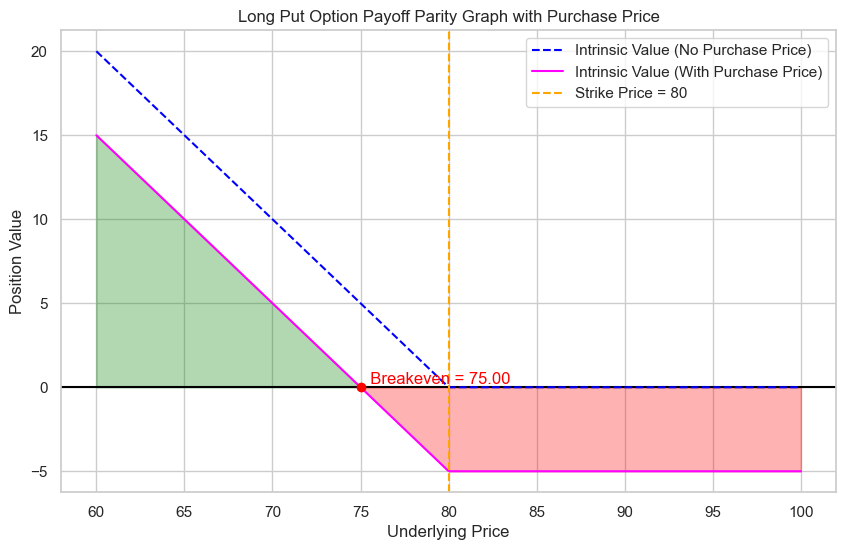

In [142]:
plot_long_put_option_parity_with_purchase_price(spot_prices, strike_price, purchase_price)

### Short Call Parity with Purchase Price

In [137]:
def plot_short_call_option_parity_with_purchase_price(spot_prices, strike_price, purchase_price):
    """
    Plot the parity graph for a short call option considering the purchase price.

    Parameters:
    spot_prices (np.array): Array of stock spot prices.
    strike_price (float): Option strike price.
    purchase_price (float): Price received to sell the option.
    
    Returns:
    None: Displays the parity graph.
    """
    # Calculate the intrinsic values using the optimized function for short call
    intrinsic_values = -intrinsic_values_call_options(spot_prices, strike_price)

    # Adjust the intrinsic values by adding the purchase price
    adjusted_values = intrinsic_values + purchase_price

    # Calculate the breakeven point
    breakeven_point = strike_price + purchase_price

    # Set up the seaborn style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the horizontal line at y=0 for the parity graph
    plt.axhline(0, color="black", linestyle="-")

    # Plot the original intrinsic values (faint dashed line)
    sns.lineplot(x=spot_prices, y=intrinsic_values, color="blue", linestyle="--", label="Intrinsic Value (No Purchase Price)")

    # Plot the adjusted intrinsic values considering the purchase price
    sns.lineplot(x=spot_prices, y=adjusted_values, color="magenta", label="Intrinsic Value (With Purchase Price)")

    # Plot the orange dashed vertical line at the strike price
    plt.axvline(x=strike_price, color="orange", linestyle="--", label=f"Strike Price = {strike_price}")

    # Highlight the breakeven point
    plt.scatter(breakeven_point, 0, color="red", zorder=5)
    plt.text(breakeven_point, 0, f"  Breakeven = {breakeven_point:.2f}", verticalalignment='bottom', horizontalalignment='left', color="red")

    # Highlight the negative payoff region above the strike price
    plt.fill_between(spot_prices, adjusted_values, where=spot_prices >= breakeven_point, color="red", alpha=0.3)

    # Highlight the positive payoff region above the strike price
    plt.fill_between(spot_prices, adjusted_values, where=spot_prices < breakeven_point, color="green", alpha=0.3)

    # Set labels and title
    plt.xlabel("Underlying Price")
    plt.ylabel("Position Value")
    plt.title("Short Call Option Payoff Parity Graph with Purchase Price")
    plt.legend()

    # Show the plot
    plt.show()

In [138]:
# Example usage:
spot_prices = np.linspace(80, 120, 400)
strike_price = 100
purchase_price = 5.00

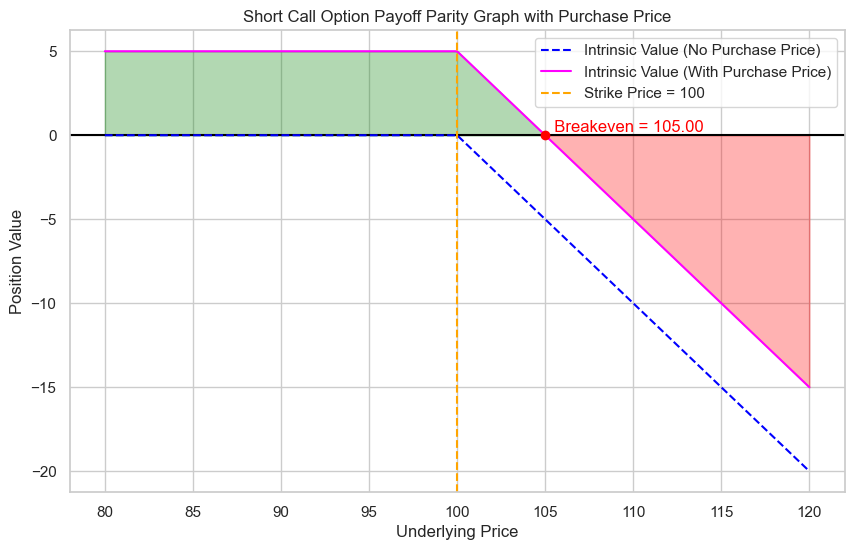

In [139]:
plot_short_call_option_parity_with_purchase_price(spot_prices, strike_price, purchase_price)

### Figure 4-14 Entire Expiration P&L Graph for the position.

#### The Slopes

In [162]:
# Example usage
spot_prices = np.array([90, 95, 105, 110])
strike_prices = np.array([95, 105, 105])
contract_type = np.array(["long-call", "short-call", "short-put"])
contract_amounts = np.array([1, 1, 2])
underlying_contracts = -2

In [222]:
# Calculate the aggregate slopes
slopes = aggregate_slopes(spot_prices, strike_prices, contract_type, contract_amounts, underlying_contracts)
print(slopes)

[ 0.  1. -2.]


#### P&L at an Exercise Price

In [204]:
def calculate_option_pnl(contract_prices, contract_amounts, contract_types, underlying_price_at_maturity, strike_prices):
    """
    Calculate the P&L of a portfolio of option contracts.

    Parameters:
    contract_prices (np.array): Array of prices paid or received for the contracts.
    contract_amounts (np.array): Array of amounts (quantities) for each contract.
    contract_types (np.array): Array of contract types such as "long-call", "short-call", "long-put", "short-put", "long-underlying", "short-underlying".
    underlying_price_at_maturity (float): The underlying price at the time of maturity.
    strike_prices (np.array): Array of strike prices for the options. Use np.nan for underlying contracts.

    Returns:
    float: The total P&L for the portfolio.
    """
    total_pnl = 0.0

    for price, amount, ctype, strike in zip(contract_prices, contract_amounts, contract_types, strike_prices):
        # Initialize contract P&L
        contract_pnl = 0.0

        if ctype == "long-call":
            intrinsic_value = max(underlying_price_at_maturity - strike, 0)
            contract_pnl = (intrinsic_value - price) * amount

        elif ctype == "short-call":
            intrinsic_value = max(underlying_price_at_maturity - strike, 0)
            contract_pnl = (price - intrinsic_value) * amount

        elif ctype == "long-put":
            intrinsic_value = max(strike - underlying_price_at_maturity, 0)
            contract_pnl = (intrinsic_value - price) * amount

        elif ctype == "short-put":
            intrinsic_value = max(strike - underlying_price_at_maturity, 0)
            contract_pnl = (price - intrinsic_value) * amount

        elif ctype == "long-underlying":
            contract_pnl = (underlying_price_at_maturity - price) * amount

        elif ctype == "short-underlying":
            contract_pnl = (price - underlying_price_at_maturity) * amount

        else:
            raise ValueError(f"Unknown contract type: {ctype}")

        # Add contract P&L to total P&L
        total_pnl += contract_pnl

        # Print each contract's P&L for clarity
        #print(f"Contract Type: {ctype}, Contract P&L: {contract_pnl:.2f}")

    # Return the total P&L
    return total_pnl

In [205]:
# Example usage:
contract_prices = np.array([6.25, 1.75, 7.75, 98.00])
contract_amounts = np.array([1, 1, 2, 2])
contract_types = np.array(["long-call", "short-call", "short-put", "short-underlying"])
strike_prices = np.array([95, 105, 105, np.nan])  # np.nan for underlying contracts
underlying_price_at_maturity = 95.00

In [206]:
total_pnl = calculate_option_pnl(contract_prices, contract_amounts, contract_types, underlying_price_at_maturity, strike_prices)
print(f"Total P&L: {total_pnl:.2f}")

Total P&L: -3.00


In [207]:
underlying_price_at_maturity = 105.00
total_pnl = calculate_option_pnl(contract_prices, contract_amounts, contract_types, underlying_price_at_maturity, strike_prices)
print(f"Total P&L: {total_pnl:.2f}")

Total P&L: 7.00


In [230]:
def breakeven_points_finder(pnl_points, slopes, underlying_prices):
    """
    Calculate the breakeven points (X-values where Y=0) for a series of piecewise linear segments.

    This function takes in a list of PnL points (Y-values), the corresponding slopes between these points, 
    and the underlying prices (X-values). It computes the linear equations for each segment between 
    consecutive points and determines the X-values where these linear equations intersect the Y=0 line.

    Parameters:
    -----------
    pnl_points : list of float
        A list of Y-values (PnL points) corresponding to the underlying prices.
        Length should be N.

    slopes : list of float
        A list of slopes between consecutive PnL points. 
        Length should be N-1, where N is the length of pnl_points.

    underlying_prices : list of float
        A list of X-values (underlying prices) corresponding to the pnl_points.
        Length should be N.

    Returns:
    --------
    breakeven_points : list of float
        A list of X-values where the corresponding Y-value is zero (breakeven points).
        These X-values lie within the intervals defined by the underlying_prices.
    
    Example:
    --------
    >>> pnl_points = [-3., -3., 7., -3.]
    >>> slopes = [0., 1., -2.]
    >>> underlying_prices = [90, 95, 105, 110]
    >>> breakeven_points = breakeven_points_finder(pnl_points, slopes, underlying_prices)
    >>> print(breakeven_points)
    [98.0, 108.5]

    Notes:
    ------
    - The function assumes that the slopes provided correspond to the linear segments 
      between consecutive pairs of `pnl_points`.
    - If a slope is zero, the function skips that segment as it does not intersect the Y=0 line.
    - Breakeven points are only returned if they lie within the interval defined by the 
      corresponding `underlying_prices`.

    """
    breakeven_points = []

    for i in range(len(slopes)):
        # Calculate the slope (m) and the intercept (c) of the linear equation y = mx + c
        m = slopes[i]
        c = pnl_points[i] - m * underlying_prices[i]

        # Solve for x when y = 0, i.e., 0 = mx + c -> x = -c/m
        if m != 0:
            breakeven_x = -c / m
            # Ensure the breakeven point lies within the current segment's interval
            if underlying_prices[i] <= breakeven_x <= underlying_prices[i + 1]:
                breakeven_points.append(breakeven_x)

    return breakeven_points


def plot_option_pnl_vs_underlying(contract_prices, contract_amounts, contract_types, strike_prices, underlying_price_range, slopes):
    """
    Plots the P&L of a portfolio of option contracts against a range of underlying prices.

    Parameters:
    contract_prices (np.array): Array of prices paid or received for the contracts.
    contract_amounts (np.array): Array of amounts (quantities) for each contract.
    contract_types (np.array): Array of contract types such as "long-call", "short-call", "long-put", "short-put", "long-underlying", "short-underlying".
    strike_prices (np.array): Array of strike prices for the options. Use np.nan for underlying contracts.
    underlying_price_range (np.array): Array of underlying prices at which to calculate P&L.
    """
    # Calculate the P&L for each underlying price
    pnls = []
    for price in underlying_price_range:
        pnl = calculate_option_pnl(contract_prices, contract_amounts, contract_types, price, strike_prices)
        pnls.append(pnl)

    # Convert to numpy array for easier manipulation
    pnls = np.array(pnls)
    print(pnls)

    # Define the breakeven points (manually calculated or identified through logic)
    breakeven_points = breakeven_points_finder(pnls, slopes, underlying_price_range)
    
    # Define the unique strike prices
    unique_strike_points = np.unique(strike_prices[~np.isnan(strike_prices)])

    # Plotting
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(underlying_price_range, pnls, label='P&L', color='magenta')
    
    # Highlight the breakeven points with circles and text
    for point in breakeven_points:
        plt.scatter(point, 0, color='red', zorder=5)
        plt.text(point, 0.5, f'Breakeven: {point:.2f}', color='red', ha='center')

    # Highlight the unique strike prices with vertical dashed lines
    for strike in unique_strike_points:
        plt.axvline(strike, color='orange', linestyle='--', label=f'Strike: {strike:.2f}')

    # Add a horizontal line at y=0
    plt.axhline(0, color='black', linestyle='--')

    plt.title('Option Portfolio P&L vs Underlying Price')
    plt.xlabel('Underlying Price at Expiration')
    plt.ylabel('Profit or Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [231]:
# Example usage of the function
contract_prices = np.array([6.25, 1.75, 7.75, 98.00])
contract_amounts = np.array([1, 1, 2, 2])
contract_types = np.array(["long-call", "short-call", "short-put", "short-underlying"])
strike_prices = np.array([95, 105, 105, np.nan])  # np.nan for underlying contracts
underlying_price_range = np.array([90, 95, 105, 110])
# Calculate the aggregate slopes
slopes = aggregate_slopes(spot_prices, strike_prices, contract_type, contract_amounts, underlying_contracts)
print(slopes)

[ 0.  1. -2.]


[-3. -3.  7. -3.]


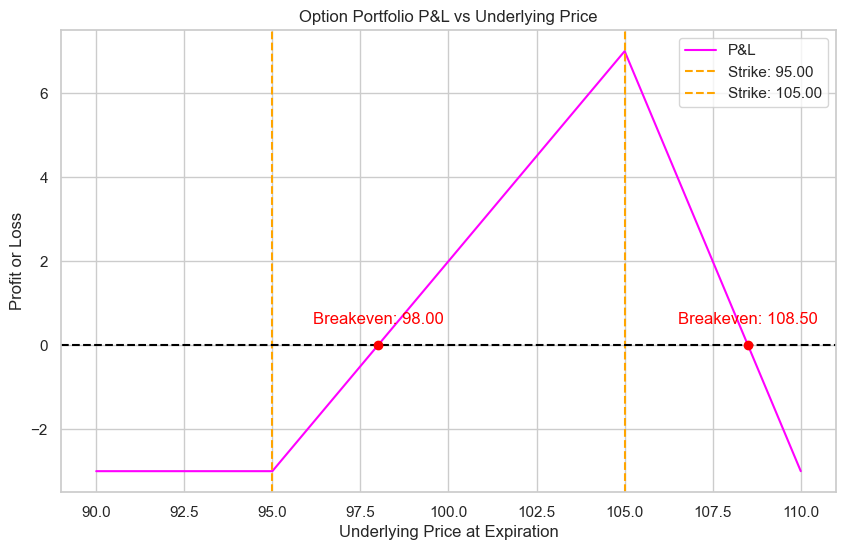

In [232]:
plot_option_pnl_vs_underlying(contract_prices, contract_amounts, contract_types, strike_prices, underlying_price_range, slopes)